In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten,MaxPooling2D
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import matplotlib.pyplot as plt

In [ ]:
# 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 폴더 경로 설정
from os import chdir as cd
cd('/content/drive/MyDrive/Final_Project')

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory('./Train_data/dry_scalp', # 데이터가 존재하는 디렉토리
                                                    batch_size=50, # 배치사이즈(변경가능)
                                                    class_mode='categorical', # 다중 분류이므로 categorical
                                                    target_size=(224, 224)) # 모델에 입력해줄 데이터 사이즈(변경

Found 20438 images belonging to 4 classes.


In [ ]:
valid_datagen = ImageDataGenerator(rescale=1./255) # 스케일링만 진행

valid_generator = valid_datagen.flow_from_directory('./Validation/dry_scalp',
                                                    batch_size=20,      
                                                    class_mode='categorical', 
                                                    target_size=(224, 224))

Found 3188 images belonging to 4 classes.


In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255) # 스케일링만 진행
test_generator = test_datagen.flow_from_directory(
    './Test/dry_scalp',
    batch_size=10,      
    class_mode='categorical', 
    target_size=(224, 224),shuffle=False)

Found 1819 images belonging to 4 classes.


In [ ]:
EN_model = tf.keras.applications.EfficientNetB0(weights = None,
                                                classes = 4,
                                                input_shape = (224,224,3)
                                               )

In [ ]:
model = EN_model
model.summary()

Model: "efficientnetb0"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 224, 224, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 stem_conv_pad (ZeroPadding2D)  (None, 225, 225, 3)  0           ['normalization[0][0

In [ ]:
# Early_stopping
early_stopping = EarlyStopping(monitor='val_loss', # 판별 기준 : val_loss
                                        patience=10,        # 5회동안 성능개선 없을시 시행 > 학습종료
                                       verbose=1)           # 콜백 실행 시 표시

In [ ]:
# ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', # 판별 기준 : val_loss
                                      patience = 5,          # 5회동안 성능개선 없을 시 시행
                                      factor = 0.2,          # learning rate 값에 0.2를 곱해줌
                                      min_lr= 0.0001,        # learning rate 최소값 : 0.0001
                                      verbose = 1)           # 콜백 실행 시 표시

In [ ]:
# Checkpoint : 가장 좋았던 성능의 모델을 저장
checkpoint = ModelCheckpoint(filepath='./박건희/Model/en01.h5',
                            monitor='val_loss',
                            verbose=1,
                            save_best_only=True,)

In [ ]:
model.compile(optimizer = 'Adam',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

In [ ]:
history = model.fit(train_generator,
                   epochs = 300,
                   # steps_per_epoch=100,
                   validation_data = valid_generator,
                   callbacks=[early_stopping, checkpoint])

Epoch 1/300
409/409 [==============================] - ETA: 0s - loss: 1.3369 - accuracy: 0.5161 
Epoch 1: val_loss improved from inf to 3.10267, saving model to ./박건희/Model/en01.h5
409/409 [==============================] - 5642s 14s/step - loss: 1.3369 - accuracy: 0.5161 - val_loss: 3.1027 - val_accuracy: 0.2556
Epoch 2/300
409/409 [==============================] - ETA: 0s - loss: 0.9836 - accuracy: 0.5955
Epoch 2: val_loss improved from 3.10267 to 2.28026, saving model to ./박건희/Model/en01.h5
409/409 [==============================] - 150s 366ms/step - loss: 0.9836 - accuracy: 0.5955 - val_loss: 2.2803 - val_accuracy: 0.3407
Epoch 3/300
409/409 [==============================] - ETA: 0s - loss: 0.9560 - accuracy: 0.6216
Epoch 3: val_loss improved from 2.28026 to 1.12083, saving model to ./박건희/Model/en01.h5
409/409 [==============================] - 150s 366ms/step - loss: 0.9560 - accuracy: 0.6216 - val_loss: 1.1208 - val_accuracy: 0.5819
Epoch 4/300
409/409 [=======================

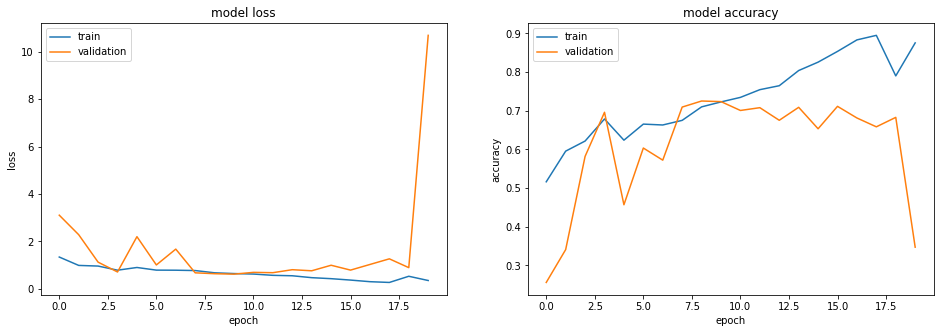

In [ ]:
# 모델 학습 과정 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(16,5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc=0)

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc=0)

In [ ]:
# 성능이 가장 우수했던 모델 호출
from tensorflow.keras.models import load_model
model = load_model('./박건희/Model/en01.h5')

In [ ]:
# Test data에 대하여 loss, acc 평가
model.evaluate(test_generator)

182/182 [==============================] - 8s 39ms/step - loss: 0.9070 - accuracy: 0.5816


[0.9070354104042053, 0.5816382765769958]

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix

np.set_printoptions(precision=2)

Y_pred = model.predict(test_generator)
classes = test_generator.classes[test_generator.index_array]
y_pred = np.argmax(Y_pred, axis=1)  # Returns maximum indices in each row

class_names = ['Normal','Mild','Moderate','Severe']

print('-- Confusion Matrix --')
print(confusion_matrix(classes, y_pred))



print('-- Classification Report --')
print(classification_report(classes, y_pred, target_names=class_names))

-- Confusion Matrix --
[[ 47  28   1   0]
 [ 64 282 276  11]
 [ 32 102 600  50]
 [  1   5 191 129]]
-- Classification Report --
              precision    recall  f1-score   support

      Normal       0.33      0.62      0.43        76
        Mild       0.68      0.45      0.54       633
    Moderate       0.56      0.77      0.65       784
      Severe       0.68      0.40      0.50       326

    accuracy                           0.58      1819
   macro avg       0.56      0.56      0.53      1819
weighted avg       0.61      0.58      0.57      1819



In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
# 히트맵 한글 출력이 원활하지 않음 ~ 영어로 label 혹은 로컬에서 주피터 노트북 사용

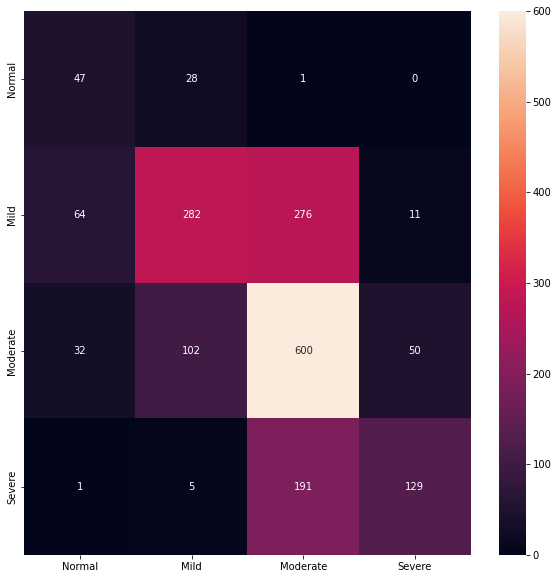

In [ ]:
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(classes, y_pred), annot=True, fmt='d',
            xticklabels=class_names,
            yticklabels=class_names)
# 히트맵뽑기

In [32]:
# model predict
import cv2

test_img = cv2.imread('./Test/dry_scalp/dry_scalp_3/9905_A2LEBJJDE00042M_1607684945204_4_LH.jpg')
test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
test_img = cv2.resize(test_img,(224,224))/255.0
test_img = test_img.reshape((1,)+test_img.shape)
pred_list = model.predict(test_img)
pred_list

array([[0.01, 0.37, 0.57, 0.05]], dtype=float32)

In [48]:
weight_arr = np.array([0,1,2,3])
result_arr = (pred_list * weight_arr)/3
result_arr.sum()

0.5496121495962143